Examine parameter and error distributions of model fits to Baker et al data.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from disp import get_line, set_font_size

FPS = 2
DT = 1/FPS
T = np.arange(61)*DT - 10
T_COLS = [f'IT_{it}' for it in range(61)]

In [7]:
df_ma_param = pd.read_csv('data/simple/neur/pacheco_ma_fit_param.csv')
df_ma_pred = pd.read_csv('data/simple/neur/pacheco_ma_fit_pred.csv')

df_data = pd.read_csv('data/simple/neur/pacheco.csv')

mout = np.zeros(len(df_ma_param['TAU_R']), dtype=bool)
# mout = (df_ma_param['TAU_R'] > 40) | (np.abs(df_ma_param['X_S']) > 20) | (np.abs(df_ma_param['X_P']) > 20)

In [8]:
df_data

,EXPT_ID,STIM,FLY,NEUROPIL,NEUROPIL_IDX,RESPONSE_TYPE_LABEL,IT_0,IT_1,IT_2,IT_3,...,IT_51,IT_52,IT_53,IT_54,IT_55,IT_56,IT_57,IT_58,IT_59,IT_60
0,0,S,1,sSADC,0,13,-0.033654,0.039349,-0.090484,0.401704,...,1.082081,0.920516,0.633192,0.459923,0.777835,0.852022,0.777709,0.278367,0.074631,0.042462
1,0,P,1,sSADC,0,13,0.617594,0.378234,0.414807,0.080734,...,0.246901,0.488439,0.480255,0.425880,0.650568,0.628899,0.368041,0.032336,0.248447,-0.126652
2,1,S,1,AMMC,1,13,0.336833,0.408993,0.474425,0.213802,...,1.001931,0.897849,0.874968,0.410459,0.555852,0.387268,0.438035,0.307526,0.391527,0.531009
3,1,P,1,AMMC,1,13,0.168264,-0.182815,-0.143902,0.101796,...,0.702984,0.584333,0.336659,0.414276,0.284469,0.080918,0.384536,0.325093,0.335583,0.242322
4,2,S,1,sSADC,0,13,0.261517,0.033362,0.034890,0.212583,...,0.288560,0.482021,0.431282,0.281125,0.085184,-0.035244,0.125191,0.065407,-0.110486,-0.020802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38067,19033,P,47,GNG,3,18,-0.039356,-0.014598,-0.034997,-0.035381,...,0.153143,0.171215,0.112855,0.084740,0.064839,0.034636,0.019822,0.042430,0.048326,0.051901
38068,19034,S,47,sSADC,0,15,0.710741,0.594676,0.427717,0.166460,...,2.247301,1.373531,1.862249,1.769727,1.958070,2.003307,1.319867,1.124926,1.354274,1.268899
38069,19034,P,47,sSADC,0,15,0.662882,0.455962,0.019223,-0.011819,...,1.422577,1.974313,1.708528,1.429057,1.396340,1.190694,0.925789,0.586538,0.335784,0.296388
38070,19035,S,47,PLP,7,12,0.123877,-0.103292,-0.265331,-0.061722,...,0.086945,0.273224,0.522694,0.491431,0.948518,1.173859,1.000480,0.539625,0.273782,-0.010819


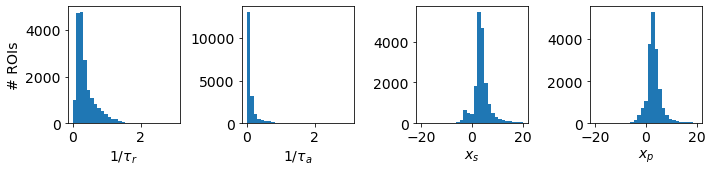

In [21]:
# multiplicative adaptation fit param distributions
fig, axs = plt.subplots(1, 4, figsize=(10, 2.5), tight_layout=True)
axs[0].hist(1/df_ma_param['TAU_R'][~mout], bins=np.linspace(0, 3, 30))
axs[0].set_xlabel(r'$1/\tau_r$')
axs[1].hist(1/df_ma_param['TAU_A'][~mout], bins=np.linspace(0, 3, 30))
axs[1].set_xlabel(r'$1/\tau_a$')
axs[2].hist(df_ma_param['X_S'][~mout], bins=np.linspace(-20, 20, 30))
axs[2].set_xlabel(r'$x_s$')
axs[3].hist(df_ma_param['X_P'][~mout], bins=np.linspace(-20, 20, 30))
axs[3].set_xlabel(r'$x_p$')

axs[0].set_ylabel('# ROIs')
set_font_size(axs, 14)

fig.savefig('supp/3_ma_params_pacheco.svg')